In [1]:
# Initial Setup and Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("vehicle_insurance.csv")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB

Missing Values:
id                      0
Gender                  0
Age            

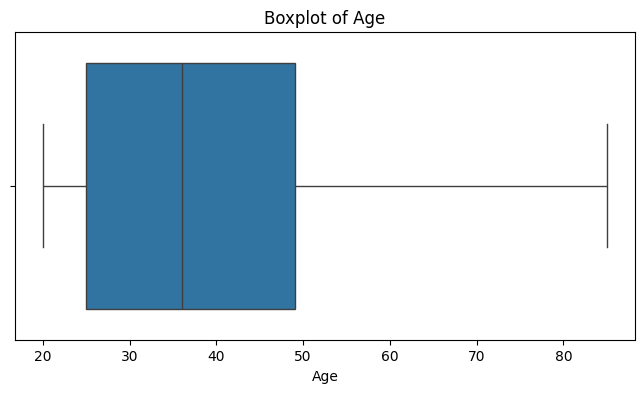

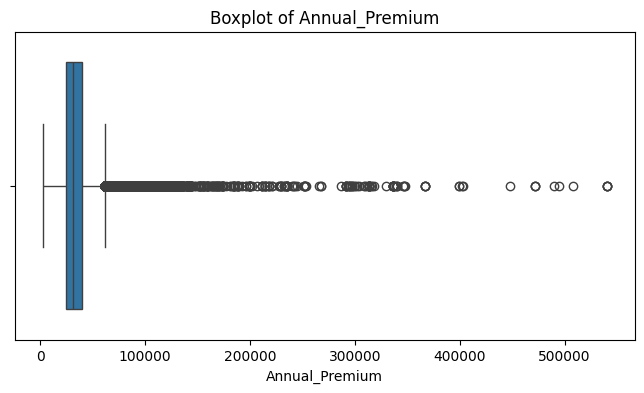

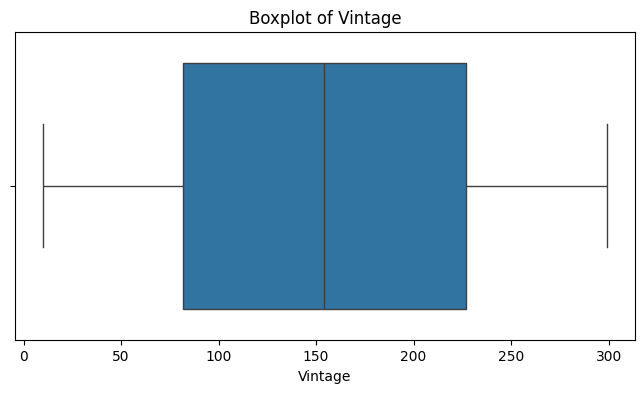

In [2]:
# Display basic info
print("Dataset Info:")
data.info()

# Check missing values
print("\nMissing Values:")
print(data.isnull().sum())  # No missing values found

# Outlier detection remains good, but let's add visualization
def plot_outliers(data, col):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Check key numeric columns for outliers
numeric_cols = ['Age', 'Annual_Premium', 'Vintage']
for col in numeric_cols:
    plot_outliers(data, col)

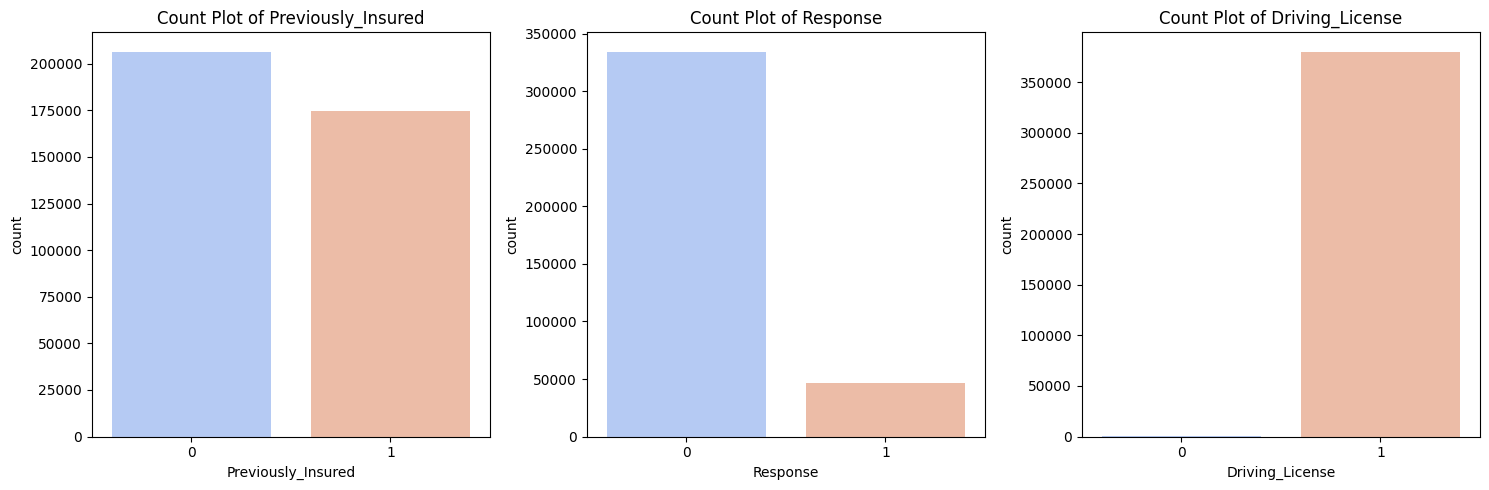

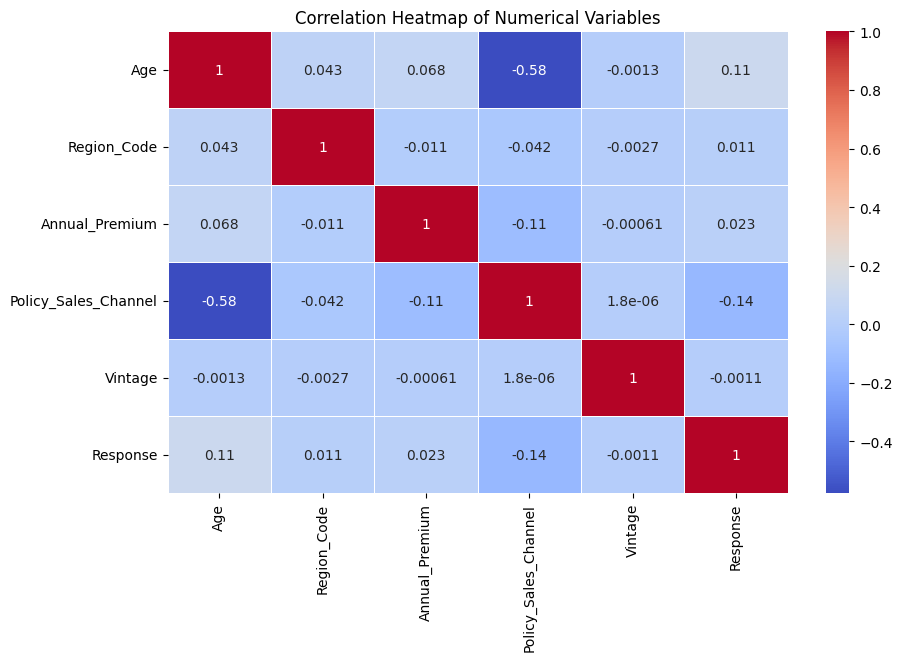

In [3]:
# Count Plots for Categorical Variables
cat_cols = ["Previously_Insured", "Response", "Driving_License"]
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=data, x=col, palette="coolwarm")
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
numeric_cols = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

Correlation with Response:
Response                1.000000
Age                     0.111147
Annual_Premium          0.022575
Region_Code             0.010570
Vintage                -0.001050
Policy_Sales_Channel   -0.139042
Name: Response, dtype: float64


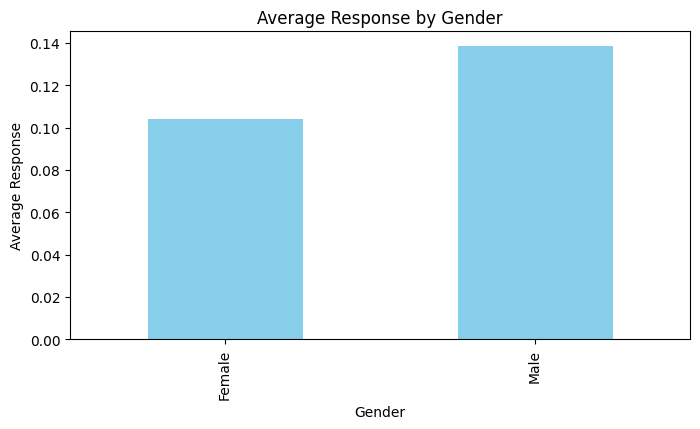


Average Response by Gender:
 Gender
Female    0.103902
Male      0.138411
Name: Response, dtype: float64


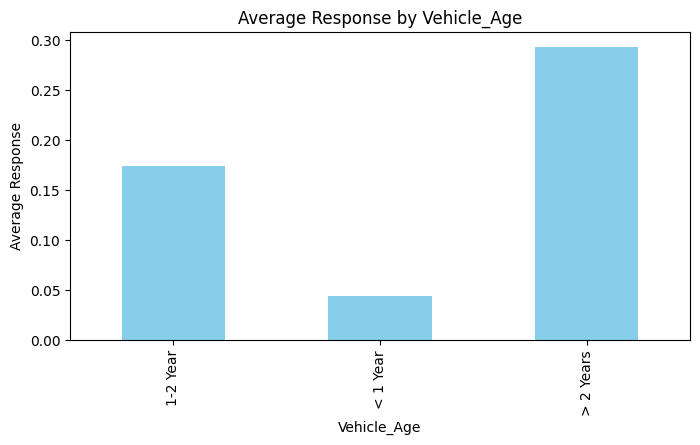


Average Response by Vehicle_Age:
 Vehicle_Age
1-2 Year     0.173755
< 1 Year     0.043705
> 2 Years    0.293746
Name: Response, dtype: float64


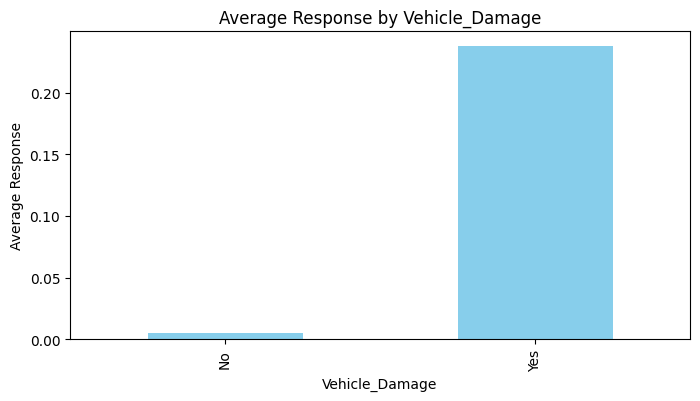


Average Response by Vehicle_Damage:
 Vehicle_Damage
No     0.005204
Yes    0.237655
Name: Response, dtype: float64


In [4]:
# Feature Analysis with Response
# Numeric Features
print("Correlation with Response:")
print(correlation_matrix['Response'].sort_values(ascending=False))

# Categorical Features Analysis
cat_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
for col in cat_features:
    plt.figure(figsize=(8, 4))
    avg_response = data.groupby(col)['Response'].mean()
    avg_response.plot(kind='bar', color='skyblue')
    plt.title(f'Average Response by {col}')
    plt.ylabel('Average Response')
    plt.show()
    print(f"\nAverage Response by {col}:\n", avg_response)

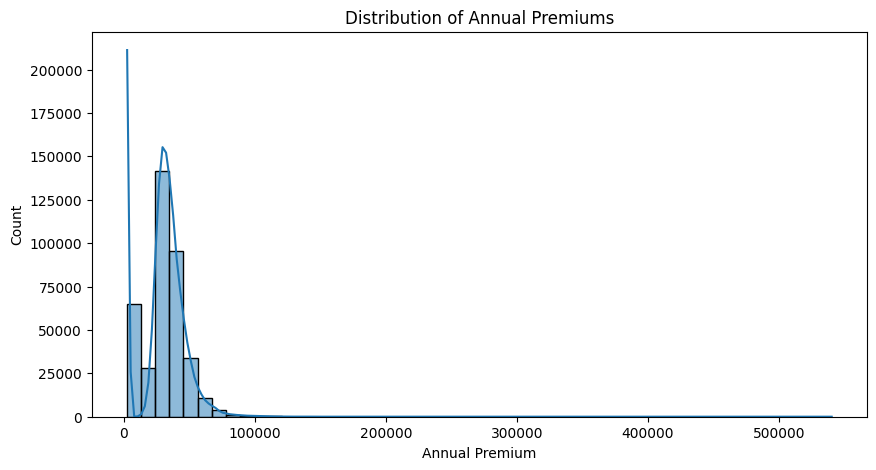


Correlation between Annual_Premium and Response:
                Annual_Premium  Response
Annual_Premium        1.000000  0.022575
Response              0.022575  1.000000

Response Rate by Vehicle Damage:
Vehicle_Damage
No     0.005204
Yes    0.237655
Name: Response, dtype: float64

Response Rate by Previously Insured:
Previously_Insured
0    0.225454
1    0.000905
Name: Response, dtype: float64


In [5]:
# Premium Distribution and Correlation
plt.figure(figsize=(10, 5))
sns.histplot(data['Annual_Premium'], bins=50, kde=True)
plt.title("Distribution of Annual Premiums")
plt.xlabel("Annual Premium")
plt.show()

print("\nCorrelation between Annual_Premium and Response:")
print(data[['Annual_Premium', 'Response']].corr())

# Premium vs Vehicle Damage and Previous Insurance
print("\nResponse Rate by Vehicle Damage:")
print(data.groupby('Vehicle_Damage')['Response'].mean())
print("\nResponse Rate by Previously Insured:")
print(data.groupby('Previously_Insured')['Response'].mean())

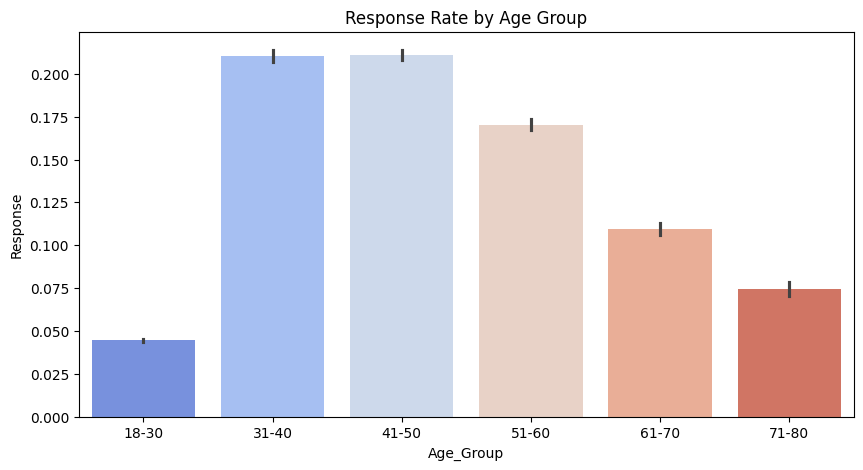

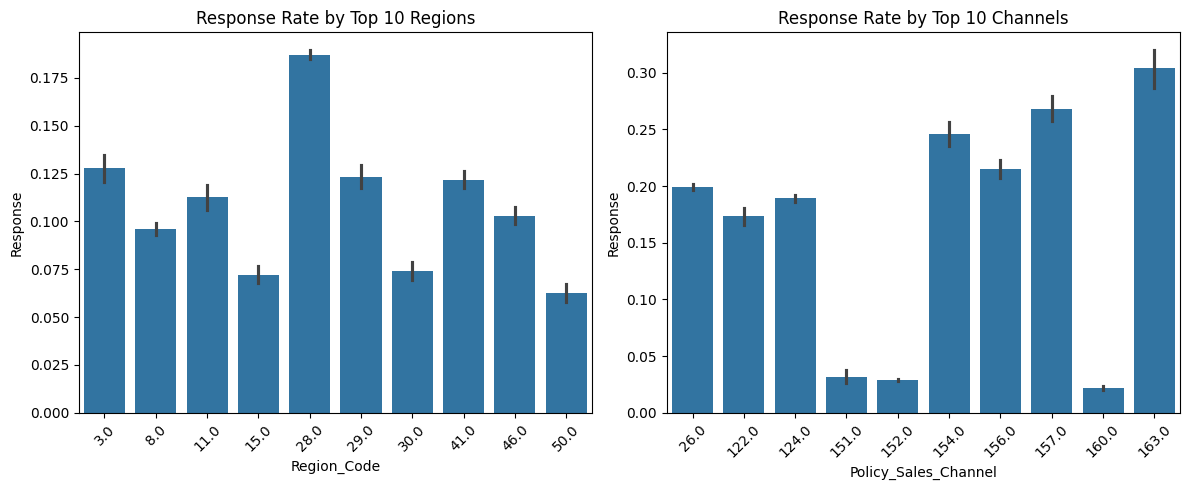

In [6]:
# Age Group Analysis
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70, 80], 
                          labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80'])
plt.figure(figsize=(10, 5))
sns.barplot(x='Age_Group', y='Response', data=data, palette='coolwarm')
plt.title('Response Rate by Age Group')
plt.show()

# Top Regions and Channels
top_regions = data['Region_Code'].value_counts().index[:10]
top_channels = data['Policy_Sales_Channel'].value_counts().index[:10]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Region_Code', y='Response', data=data[data['Region_Code'].isin(top_regions)])
plt.title('Response Rate by Top 10 Regions')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='Policy_Sales_Channel', y='Response', data=data[data['Policy_Sales_Channel'].isin(top_channels)])
plt.title('Response Rate by Top 10 Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

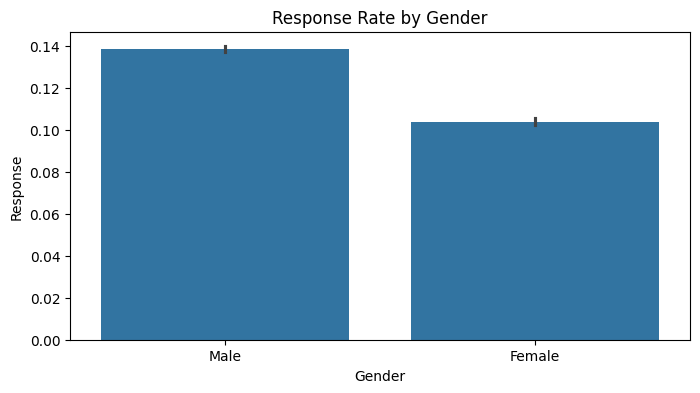

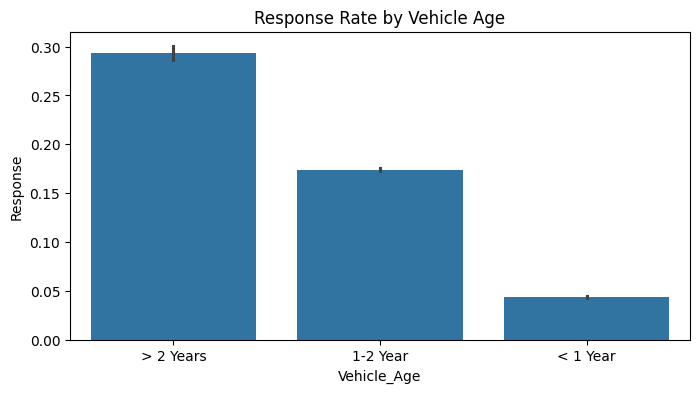


Top 10 Regions by Customer Count:
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
Name: count, dtype: int64


In [7]:
# Gender Analysis
plt.figure(figsize=(8, 4))
sns.barplot(x='Gender', y='Response', data=data)
plt.title('Response Rate by Gender')
plt.show()

# Vehicle Age Analysis
plt.figure(figsize=(8, 4))
sns.barplot(x='Vehicle_Age', y='Response', data=data)
plt.title('Response Rate by Vehicle Age')
plt.show()

# Regional Analysis (already covered in top regions)
print("\nTop 10 Regions by Customer Count:")
print(data['Region_Code'].value_counts().head(10))

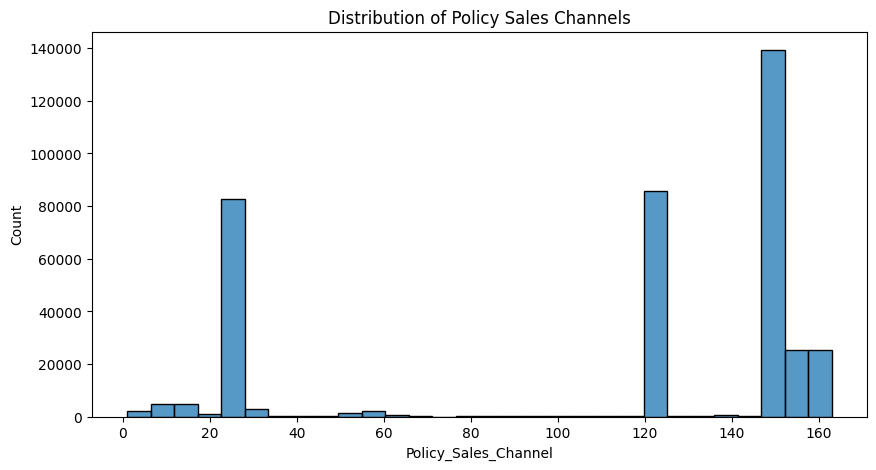

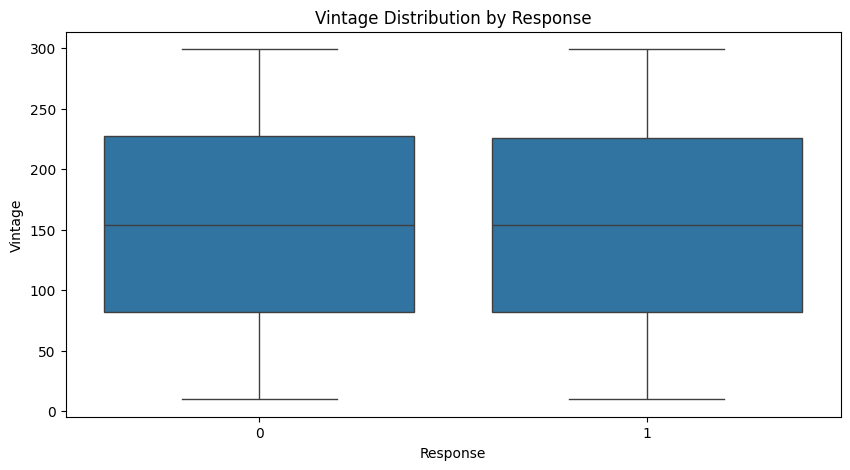


Average Vintage by Response:
Response
0    154.380243
1    154.112246
Name: Vintage, dtype: float64


In [8]:
# Policy Sales Channel Distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Policy_Sales_Channel'], bins=30)
plt.title('Distribution of Policy Sales Channels')
plt.show()

# Vintage (Customer Loyalty) Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x='Response', y='Vintage', data=data)
plt.title('Vintage Distribution by Response')
plt.show()
print("\nAverage Vintage by Response:")
print(data.groupby('Response')['Vintage'].mean())

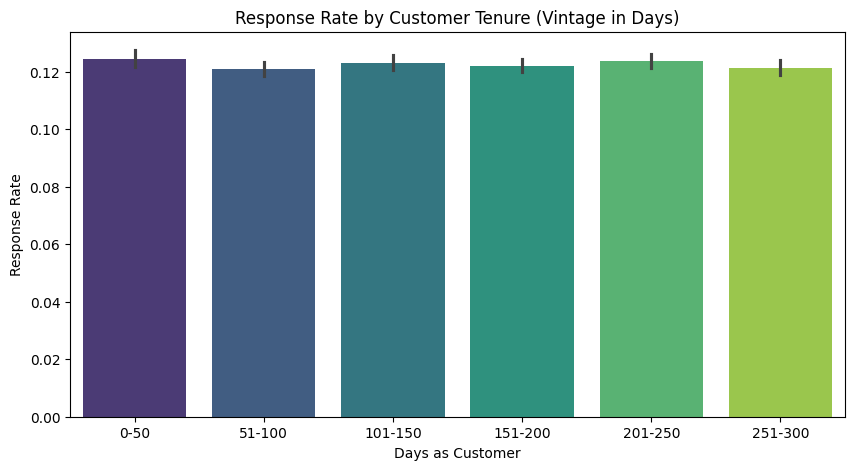

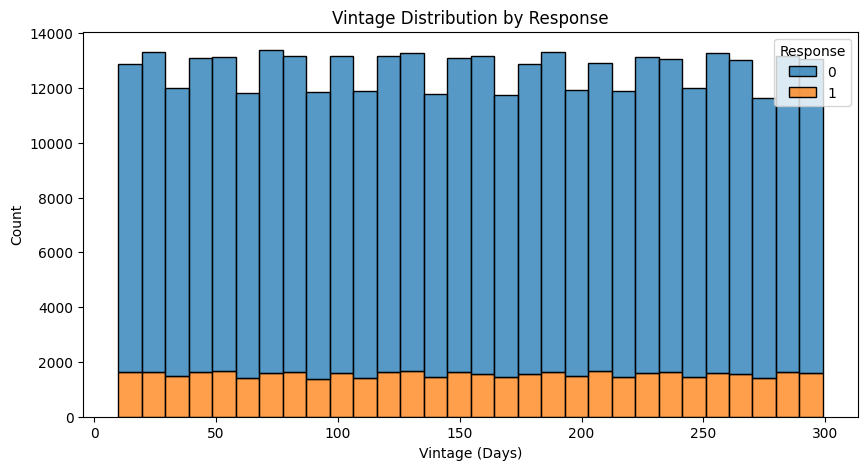


Vintage Statistics by Response:
             count        mean        std   min   25%    50%    75%    max
Response                                                                  
0         334399.0  154.380243  83.661975  10.0  82.0  154.0  227.0  299.0
1          46710.0  154.112246  83.738574  10.0  82.0  154.0  226.0  299.0


In [9]:
# Cell 11: Time Analysis: Customer Tenure (Vintage) Patterns
# Time Analysis using Vintage
# Create Vintage groups
data['Vintage_Group'] = pd.cut(data['Vintage'], bins=[0, 50, 100, 150, 200, 250, 300], 
                              labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# Plot Response Rate by Vintage Group
plt.figure(figsize=(10, 5))
sns.barplot(x='Vintage_Group', y='Response', data=data, palette='viridis')
plt.title('Response Rate by Customer Tenure (Vintage in Days)')
plt.xlabel('Days as Customer')
plt.ylabel('Response Rate')
plt.show()

# Distribution of Vintage by Response
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Vintage', hue='Response', bins=30, multiple='stack')
plt.title('Vintage Distribution by Response')
plt.xlabel('Vintage (Days)')
plt.show()

# Statistical summary
print("\nVintage Statistics by Response:")
print(data.groupby('Response')['Vintage'].describe())